In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

plt.style.use('default')

## **Problem 1 to 2:**

**Dataset link:** power_generation.csv

**Add a label to every axis and add a proper title for the charts (For every subplot, it is applicable). Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **Problem-1:** Make a subplots which have 2 plots.

- For the first chart, draw a scatter plot "*Monitored Cap.(MW)*" vs "*Total Cap. Under Maintenance (MW)*" of top 5 most frequent power stations. Then draw the lines which indicate the average values of these two columns. Change the colors according to the names of the Power Stations.
- For the second chart, draw a scatter plot "*Monitored Cap. (MW)*" vs "*Actual(MU)*" of the top 5 most frequent power stations. Also draw the lines which indicates the average values of these two columns. Change the colors according to the names of the Power Stations.


In [2]:
# code here
df = pd.read_csv('power_generation.csv')
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


In [3]:
most_freq = df['Power Station'].value_counts().head().index.tolist()

In [4]:
temp_df = df[df['Power Station'].isin(most_freq)]

In [5]:
encoder = LabelEncoder()
temp_df['Power Station'] = encoder.fit_transform(temp_df['Power Station'])

C:\Users\HU496FA\AppData\Local\Temp\ipykernel_21184\1815760082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Power Station'] = encoder.fit_transform(temp_df['Power Station'])


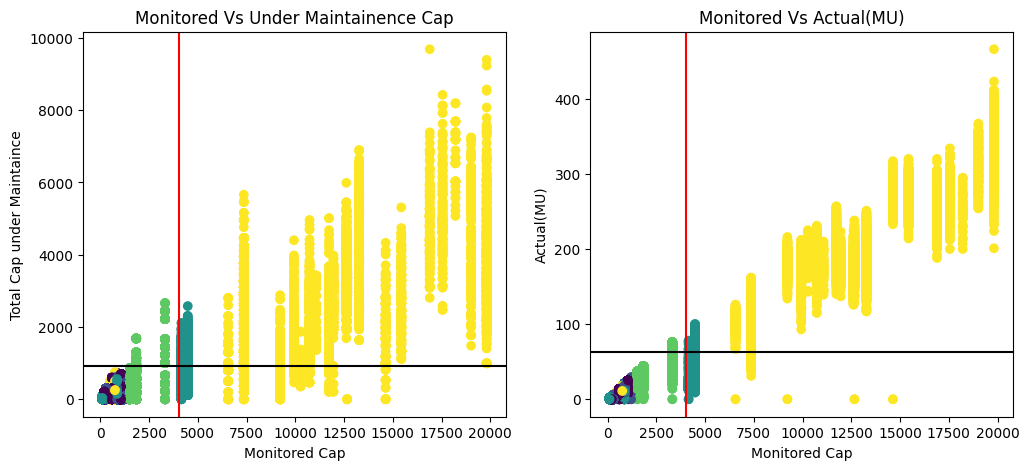

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].scatter(temp_df['Monitored Cap.(MW)'],temp_df['Total Cap. Under Maintenace (MW)'],c=temp_df['Power Station'])
ax[0].axvline(temp_df['Monitored Cap.(MW)'].mean(),c='red')
ax[0].axhline(temp_df['Total Cap. Under Maintenace (MW)'].mean(),c='black')
ax[0].set_xlabel('Monitored Cap')
ax[0].set_ylabel('Total Cap under Maintaince')
ax[0].set_title('Monitored Vs Under Maintainence Cap')

ax[1].scatter(temp_df['Monitored Cap.(MW)'],temp_df['Actual(MU)'],c=temp_df['Power Station'])
ax[1].axvline(temp_df['Monitored Cap.(MW)'].mean(),c='red')
ax[1].axhline(temp_df['Actual(MU)'].mean(),c='black')
ax[1].set_xlabel('Monitored Cap')
ax[1].set_ylabel('Actual(MU)')
ax[1].set_title('Monitored Vs Actual(MU)')

None

### **Problem-2:** Draw a 3D Scatter plot between "*Monitored Cap.(MW)*", "*Total Cap. Under Maintenace (MW)*" and "*Forced Maintanence(MW)*"

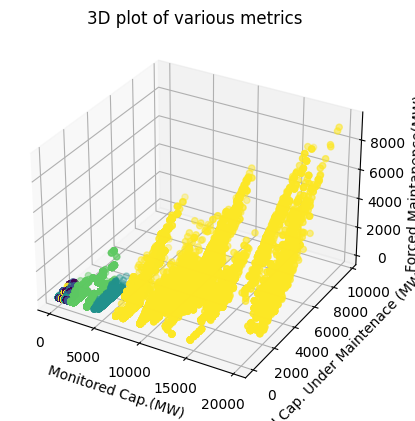

In [7]:
# code here
fig = plt.figure()

ax = plt.subplot(projection='3d')

ax.scatter3D(temp_df['Monitored Cap.(MW)'],temp_df['Total Cap. Under Maintenace (MW)'],temp_df['Forced Maintanence(MW)'],c=temp_df['Power Station'])
ax.set_xlabel('Monitored Cap.(MW)')
ax.set_ylabel('Total Cap. Under Maintenace (MW)')
ax.set_zlabel('Forced Maintanence(MW)')
ax.set_title('3D plot of various metrics')

plt.show()

### **Problem-3:** Make a 3D *Surface* plot of this below mathematical equation.

$$z = |x| - |y|$$

In [8]:
# code here
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

xx, yy = np.meshgrid(x,y)

z = np.abs(xx) - np.abs(yy)

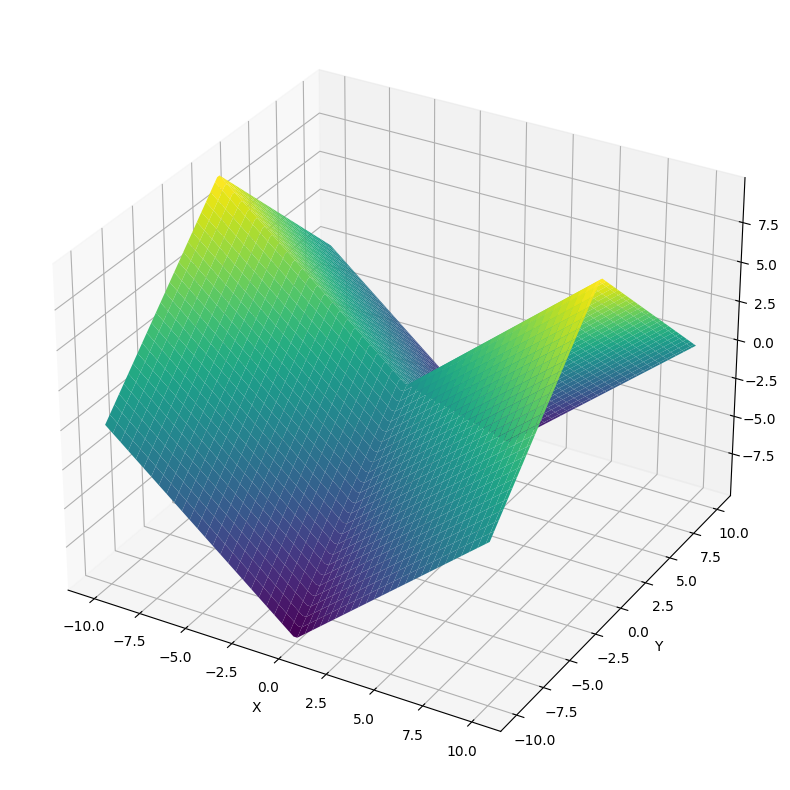

In [9]:
fig = plt.figure(figsize=(10,10))

ax = plt.subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot_surface(xx,yy,z, cmap='viridis')
plt.show()

### **Problem-4:** Draw the 3D *Contour plot* of this below equation:

$$z = |x| - |y|$$

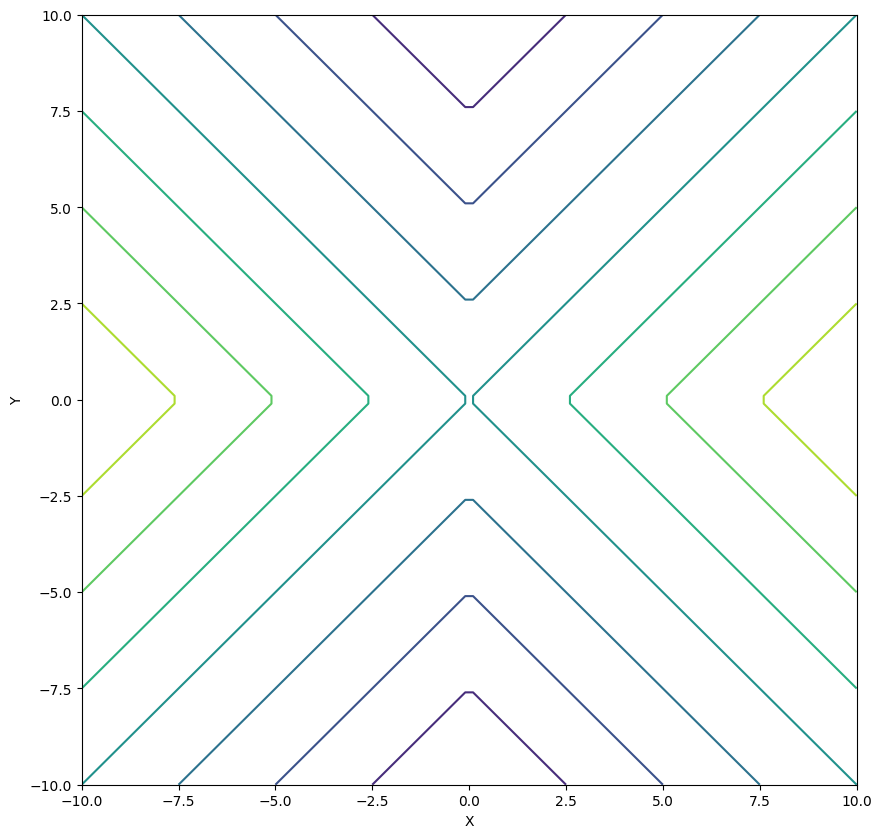

In [10]:
# code here
fig = plt.figure(figsize=(10,10))

ax = plt.subplot()
ax.contour(xx,yy,z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

### **Problem-5:** Draw a second type of Countour plot of the below equation:

$$z = |x| - |y|$$

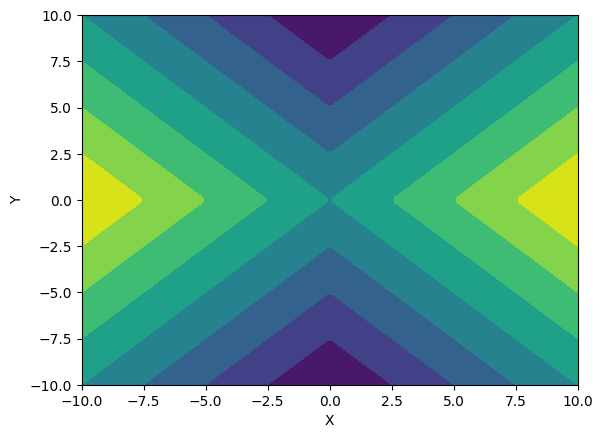

In [11]:
# code here
fig = plt.figure()

ax = plt.subplot()
ax.contourf(xx,yy,z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

## `Problem 6-7`

Data Set Link - nifty-50.csv


**Description of Dataset:**

* Date: It gives the date of which stocks details are given.
* Symbol: Name of stock
* Open: It gives the opening price of stock on that date.
* High: It gives the highest price to which the stock ascened on that day.
* Low: It gives the highest price to which the stock plummeted on that day.
* Close: It gives the closing price of stock on that date.
* Volume: It gives the amount of stock traded on that date.
* VWAP: The volume-weighted average price (VWAP) is a statistic used by traders to determine what the average price is based on both price and volume.
* Turnover:

In [12]:
nifty = pd.read_csv('nifty-50.csv')
nifty.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN


### `Problem-6` Use Pandas plot functions

* Line plot of closing value of top 5 Stocks in Year 2020.
* Take top 5 stocks based on total turnover in Year 2020

In [13]:
# code here
nifty['Date'] = pd.to_datetime(nifty['Date'])

In [14]:
nifty.set_index('Date',inplace=True)

In [15]:
temp_df = nifty[nifty.index.year == 2020]

In [16]:
top_5 = temp_df.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head().index

In [17]:
tempm_df = temp_df[temp_df['Symbol'].isin(top_5)]

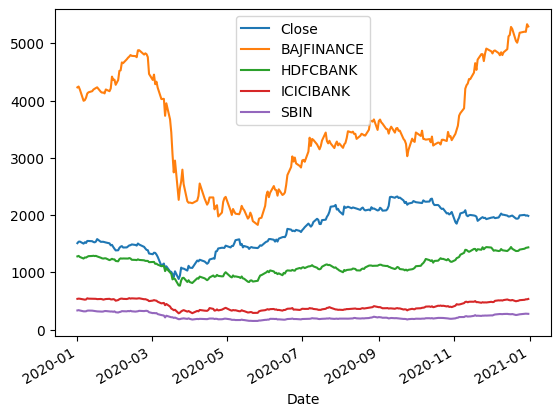

In [18]:
ax = temp_df[temp_df.Symbol=='RELIANCE'].plot(y='Close', use_index=True)

for company in top_5[1:]:
    temp_df[temp_df.Symbol==company].plot(y='Close', label=company, use_index=True, ax=ax)

### `Problem-7` Scatter plot Close price vs Volume for TOP-5 Stocks in year 2021
* Color on Symbol Column

<Axes: xlabel='Close', ylabel='Volume'>

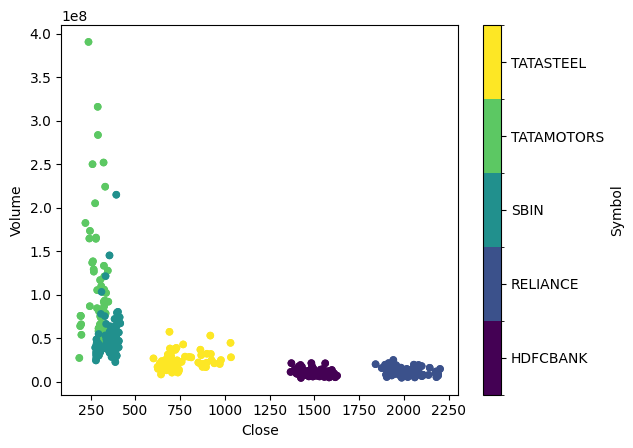

In [19]:
# code here
temp_df = nifty[nifty.index.year == 2021]
top_5 = temp_df.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head().index
temp_df = temp_df[temp_df['Symbol'].isin(top_5)]

temp_df['Symbol'] = temp_df['Symbol'].astype('category')
temp_df.plot(kind='scatter', x='Close', y='Volume', c='Symbol', colormap='viridis')

### `Problem-8` Create a 3-D Scatter Plot using `time,x,y` on below synthetic data. and give color gradiant on `z`
```
# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
```

In [20]:
# code here
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})

data

,time,x,y,z
0,0.00000,0.000000,1.000000,0.00000
1,0.10101,0.100838,0.994903,0.10101
2,0.20202,0.200649,0.979663,0.20202
3,0.30303,0.298414,0.954437,0.30303
4,0.40404,0.393137,0.919480,0.40404
...,...,...,...,...
95,9.59596,-0.170347,-0.985384,9.59596
96,9.69697,-0.268843,-0.963184,9.69697
97,9.79798,-0.364599,-0.931165,9.79798
98,9.89899,-0.456637,-0.889653,9.89899


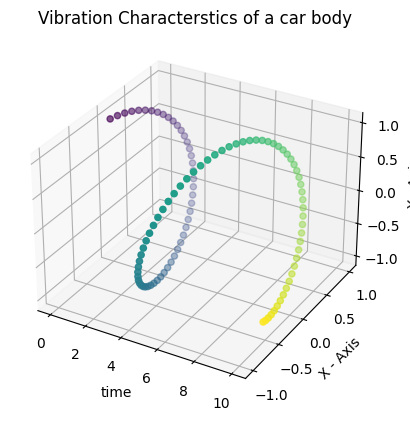

In [21]:
fig = plt.figure()

ax = plt.axes(projection='3d')

ax.scatter(data['time'],data['x'],data['y'], c=data['z'])

ax.set_xlabel('time')
ax.set_ylabel('X - Axis')
ax.set_zlabel('Y - Axis')

plt.title('Vibration Characterstics of a car body')
plt.show()

### `Problem 9:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = sin(\sqrt{x^2 + y^2})$$


In [22]:
# code here
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

xx,yy = np.meshgrid(x,y)

z = np.sin(np.sqrt(xx**2 + yy**2))

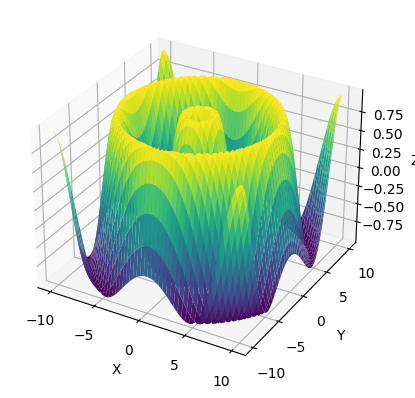

In [23]:
fig = plt.figure()
ax = plt.subplot(projection='3d')

ax.plot_surface(xx,yy,z,cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

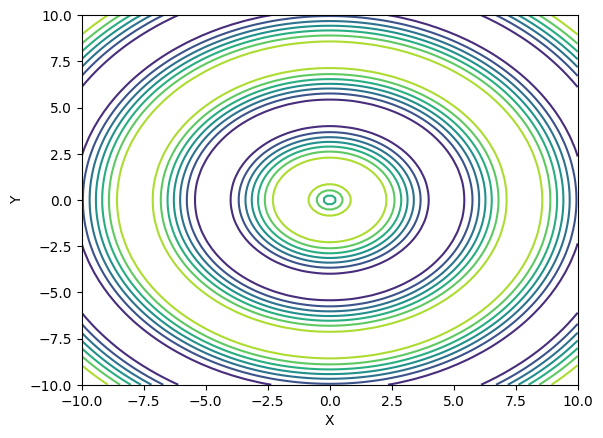

In [24]:
fig = plt.figure()
ax = plt.subplot()

ax.contour(xx,yy,z,cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

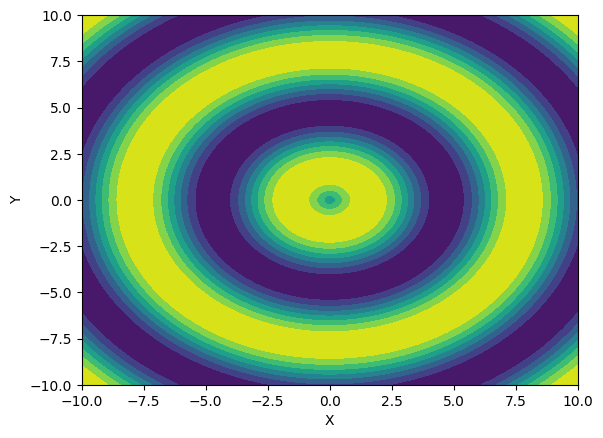

In [25]:
fig = plt.figure()
ax = plt.subplot()

ax.contourf(xx,yy,z,cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

### `Problem 10:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = tan(\log_2({x^2 + y^2})$$

In [26]:
# code here
# code here
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

xx,yy = np.meshgrid(x,y)

z = np.tan(np.log2(xx**2 + yy**2))

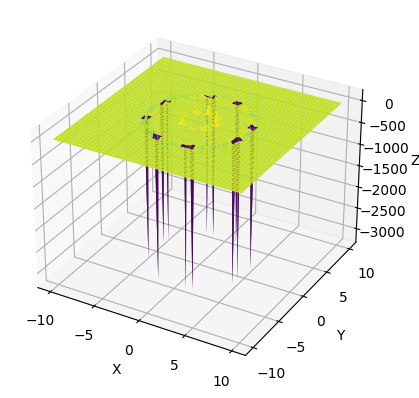

In [27]:
fig = plt.figure()
ax = plt.subplot(projection='3d')

ax.plot_surface(xx,yy,z,cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

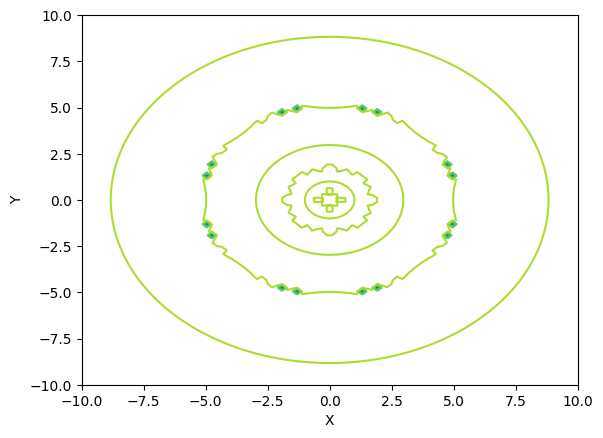

In [28]:
fig = plt.figure()
ax = plt.subplot()

ax.contour(xx,yy,z,cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

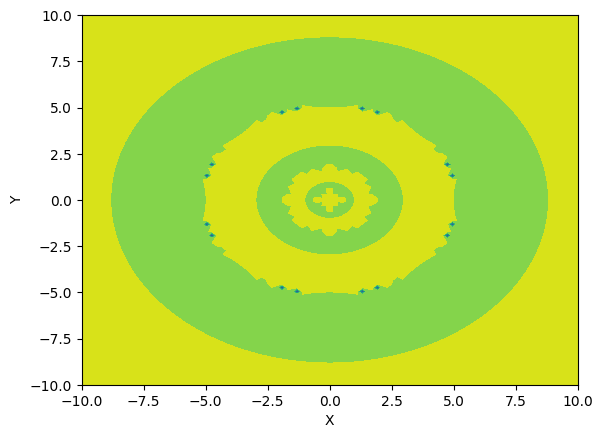

In [29]:
fig = plt.figure()
ax = plt.subplot()

ax.contourf(xx,yy,z,cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()